In [84]:
import os
import pandas as pd
import numpy as np
import seaborn_image as isns
from pathlib import Path
import imageio
from PIL import Image
import cv2
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import random
import seaborn as sb
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
import imagehash
from sklearn.cluster import KMeans
from skimage.color import rgb2gray
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score

plt.rcParams['figure.figsize'] = [2.0, 2.0]
plt.rcParams['figure.dpi'] = 80
plt.style.use('ggplot')
plt.rcParams["axes.grid"] = False



In [5]:
files = []

for dirname, _, filenames in os.walk('./2750'):
    for filename in filenames:
        if ".jpg" in filename:
            name = "" + os.path.join(dirname, filename)
            files.append(name)
            #print(name)


print(files[0])
print(len(files))
            



./2750/Forest/Forest_864.jpg
27000


In [6]:
raw_images = np.zeros([len(files),64, 64, 3])
io_img = list()
cv_img = []

print(len(raw_images))
print(type(raw_images))

27000
<class 'numpy.ndarray'>


Loading completed
AxesImage(20,20;124x120.8)


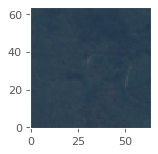

In [7]:
i=0
for img in files:
    #raw_images[i] = np.asarray(Image.open(Path(img))).astype('uint8')
    raw_images[i] = np.asarray(Image.open(Path(img))).astype('uint8')/255
    io_img.append(imageio.imread(Path(img)))
    cv_img.append(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB))
    i = i+1
    #raw_images[i].show()

#print(raw_images[1])
print('Loading completed')
print(plt.imshow(io_img[0]))

# If you want to show it, you can use img/255.

# Or

# np.array(img,np.int32)
# The reason is that if the color intensity is a float, then matplotlib expects it to range from 0 to 1. If an int, then it expects 0 to 255. So you can either force all the numbers to int or scale them all by 1/255.


In [8]:
labels = np.empty(len(files), dtype = 'S20')

i = 0
for label in files:
    labels[i] = label.split('/')[2] #Mac
#    labels[i] = label.split('\\')[1] #Windows
    i += 1

print(labels)

[b'Forest' b'Forest' b'Forest' ... b'Pasture' b'Pasture' b'Pasture']


In [9]:
# change them to integers in alphabetical order
label_names, yLabels = np.unique(labels, return_inverse=True)

label_Dict = dict(zip(np.unique(yLabels), label_names))
print(label_Dict)
np.array(np.unique(yLabels, return_counts=True))

{0: b'AnnualCrop', 1: b'Forest', 2: b'HerbaceousVegetation', 3: b'Highway', 4: b'Industrial', 5: b'Pasture', 6: b'PermanentCrop', 7: b'Residential', 8: b'River', 9: b'SeaLake'}


array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9],
       [3000, 3000, 3000, 2500, 2500, 2000, 2500, 3000, 2500, 3000]])

0
b'AnnualCrop'
raw:


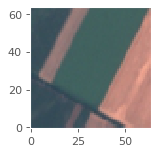

In [12]:
# test that the labels and images read in properly
tmp = 9999
#img = raw_images[tmp]
img = io_img[tmp]

print(yLabels[tmp])
print(label_names[yLabels[tmp]])
print("raw:")
#print(img)
#pplt.imshow(img);
plt.imshow(img.astype('uint8'));


io:
(3,)


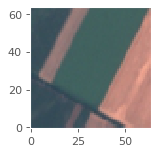

In [13]:
print("io:")
print(raw_images[tmp][1,1,].shape)
plt.imshow(io_img[tmp])
#isns.imgplot(raw_images[tmp], Describe=True)

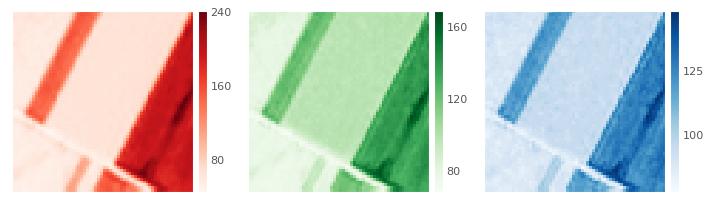

In [14]:
isns.rgbplot(io_img[tmp])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(io_img, yLabels, stratify = yLabels, train_size = 0.5, random_state=42)

In [16]:
io_img[1].shape


(64, 64, 3)

In [17]:
io_img[1][1,1]

Array([41, 69, 81], dtype=uint8)

In [18]:
raw_images[1][1,1]

array([0.16078431, 0.27058824, 0.31764706])

In [19]:
cv_img[1][1,1]

array([41, 69, 81], dtype=uint8)

In [20]:
raw_images[1][1,1,0].dtype

dtype('float64')

In [21]:
io_img[1][1,1,0].dtype

dtype('uint8')

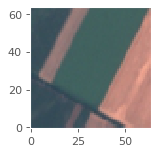

In [22]:
img = io_img[tmp]
plt.imshow(img)

In [23]:
red1 = np.zeros_like(io_img[tmp])
red1[:,:,0] = io_img[tmp][:,:,0] 
#red1.shape

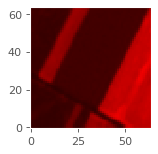

In [24]:
plt.imshow(red1)

In [25]:
green = np.zeros_like(io_img[tmp])
green[:,:,1] = img[:,:,1] 

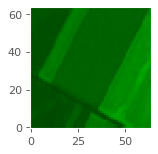

In [26]:
plt.imshow(green)

In [27]:
blue = np.zeros_like(io_img[tmp])
blue[:,:,2] = img[:,:,2] 

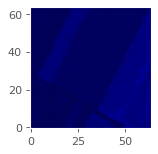

In [28]:
plt.imshow(blue)

In [29]:
def get_channel(pic1, ch):
    ch1 = np.zeros_like(pic1)
    ch1[:,:,ch] = pic1[:,:, ch]
    return ch1

def get_red_channel(pic):
    #red1 = np.zeros_like(pic)
    #red1[:,:,0] = pic[:,:,0]
    return get_channel(pic, 0)

def get_green_channel(pic):
    #green1 = np.zeros_like(pic)
    #green1[:,:,1] = pic[:,:,1]
    return get_channel(pic, 1)

def get_blue_channel(pic):
    #blue1 = np.zeros_like(pic)
    #blue1[:,:,2] = pic[:,:,2]
    return get_channel(pic, 2)

def get_red_channel_only(pic):
    #red1 = np.zeros_like(pic)
    #red1[:,:,0] = pic[:,:,0]
    return get_channel(pic, 0)[:,:,0]

def get_green_channel_only(pic):
    #green1 = np.zeros_like(pic)
    #green1[:,:,1] = pic[:,:,1]
    return get_channel(pic, 1)[:,:,1]

def get_blue_channel_only(pic):
    #blue1 = np.zeros_like(pic)
    #blue1[:,:,2] = pic[:,:,2]
    return get_channel(pic, 2)[:,:,2]

def display_blue(pic):
    #blue1 = np.zeros_like(io[i])
    #blue1[:,:,2] = img[:,:,2]
    blue1 = get_blue_channel(pic)
    plt.imshow(blue1)
    
def display_green(pic):
    #green1 = np.zeros_like(io[i])
    #green1[:,:,1] = img[:,:,1]
    green1 = get_green_channel(pic)
    plt.imshow(green1)
    
def display_red(pic):
    red1 = get_red_channel(pic)
    plt.imshow(red1)

def element_tuple_idx(arr, tpl):
    idx0 = tpl[0]
    idx1 = tpl[1]
    idx2 = tpl[2]
    idx3 = tpl[3]
    return arr[idx0, idx1, idx2, idx3]

def draw_image_with_idx(draw_idx):
    plt.imshow(io_img[draw_idx])
    
def find_max_px_by_channel(pic, ch):
    mx = pic[:,:,ch];
    return mx.max()

def find_min_px_by_channel(pic, ch):
    mn = pic[:,:,ch];
    return mn.min()

def get_max_px_coord_by_channel(pic, ch):
    ch2 = pic[:,:, ch]
    return np.unravel_index(ch2.argmax(), ch2.shape)

def get_min_px_coord_by_channel(pic, ch):
    ch2 = pic[:,:, ch]
    return np.unravel_index(ch2.argmin(), ch2.shape)

def find_max(pic):
    br = pic.sum(axis=2)
    return br.max()

def find_min(pic):
    br = pic.sum(axis=2)
    return br.min()

def get_max_coord(pic):
    br = pic.sum(axis=2)
    return np.unravel_index(br.argmax(), br.shape)

def get_min_coord(pic):
    br = pic.sum(axis=2)
    return np.unravel_index(br.argmin(), br.shape)

def get_sum_channels(pic):
    ch1 = pic[:,:, 0].flatten().sum()
    ch2 = pic[:,:, 1].flatten().sum()
    ch3 = pic[:,:, 2].flatten().sum()
    return ch1, ch2, ch3

def get_mean_channels(pic):
    ch1 = np.around(pic[:,:, 0].flatten().mean(), decimals = 3)
    ch2 = np.around(pic[:,:, 1].flatten().mean(), decimals = 3)
    ch3 = np.around(pic[:,:, 2].flatten().mean(), decimals = 3)
    return ch1, ch2, ch3

def get_median_channels(pic):
    ch1 = np.median(pic[:,:, 0].flatten())
    ch2 = np.median(pic[:,:, 1].flatten())
    ch3 = np.median(pic[:,:, 2].flatten())
    return ch1, ch2, ch3

def get_distance(x, y):
    return distance.euclidean(x, y)

def get_distance_red(pic):
    return get_distance(get_max_px_coord_by_channel(pic, 0), get_min_px_coord_by_channel(pic, 0))

def get_distance_green(pic):
    return get_distance(get_max_px_coord_by_channel(pic, 1), get_min_px_coord_by_channel(pic, 1))

def get_distance_blue(pic):
    return get_distance(get_max_px_coord_by_channel(pic, 2), get_min_px_coord_by_channel(pic, 2))

def get_multy_distance(pic):
    return get_distance(get_max_coord(pic), get_min_coord(pic))

#Luminance (standard for certain colour spaces): (0.2126*R + 0.7152*G + 0.0722*B)
def lum(px):
    return 0.2126*px[0]+0.7152*px[1]+0.0722*px[2]

def lum_max(pic):
    lm = np.apply_along_axis(lum, 2, pic)
    return lm.max()

def lum_min(pic):
    lm = np.apply_along_axis(lum, 2, pic)
    return lm.min()

def lum_distance(pic):
    lm = np.apply_along_axis(lum, 2, pic)
    return get_distance(np.unravel_index(lm.argmax(), lm.shape), np.unravel_index(lm.argmin(), lm.shape))

def get_dominant_color(pic):
    pi = Image.fromarray(pic)
    pi = pi.resize((1, 1), resample=0)
    r = np.asarray(pi.getpixel((0, 0))).astype('uint8')
    return r[0], r[1], r[2]
    
def get_hist_data_by_index(img_index):
    bin_div = 5
    img = io_img[img_index]
    r, bins =  np.histogram(img[:,:,0], bins=255//bin_div, range=(0,255), density=True)
    g = np.histogram(img[:,:,1], bins=255//bin_div, range=(0,255), density=True)[0]
    b = np.histogram(img[:,:,2], bins=255//bin_div, range=(0,255), density=True)[0]
    return bins, r, g, b


def plot_image_by_index(img_index, height=6):
    img = io[img_index]
    sb.histplot(data=penguins, y="flipper_length_mm")

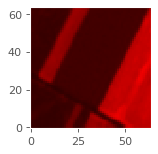

In [30]:
plt.imshow(get_red_channel(io_img[tmp]))

In [31]:
# most red pic
io_img[1].shape

(64, 64, 3)

In [32]:
#pics = np.asarray(io_img)
#pics.shape

In [33]:
len(io_img)

27000

In [34]:
mx = io_img[tmp][:,:,0]
#mx = mx.reshape(*mx.shape[:-2], -1)
#mx.flatten().shape
#mx.shape
#mx[mx.argmax()]
mx.max()

241

In [35]:
maxRed = get_red_channel_only(io_img[tmp])
maxRed.argmax()
np.unravel_index(maxRed.argmax(), maxRed.shape)

(29, 59)

In [36]:
maxRed[39,2]

57

In [37]:
io_img[tmp][38,3]

Array([56, 78, 89], dtype=uint8)

In [38]:
x = get_max_px_coord_by_channel(io_img[tmp], 2);
x

(7, 46)

In [39]:
y = get_min_px_coord_by_channel(io_img[tmp], 2)
y

(8, 34)

In [40]:
#get sum of each channel (R,G,B)
su = get_sum_channels(io_img[tmp])
su

(423897, 425484, 422333)

In [41]:
me = get_mean_channels(io_img[tmp])
me

(103.49, 103.878, 103.109)

In [42]:
dst = distance.euclidean(x, y)
dst

12.041594578792296

In [43]:
dst2 = get_distance_red(pic)
dst2

NameError: name 'pic' is not defined

In [273]:
dst3 = get_multy_distance(pic)
dst3

21.95449840010015

In [274]:
dst4 = lum_distance(pic)
dst4

42.44997055358225

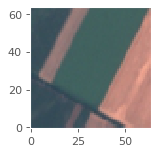

In [44]:
draw_image_with_idx(tmp)

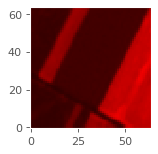

In [45]:
red = np.zeros_like(io_img[tmp])
red[:,:,0] = img[:,:,0] 
plt.imshow(red)
plt.show()

In [46]:
pics[71,:,:,0].flatten().shape

NameError: name 'pics' is not defined

In [47]:
#######K_Means clusters#########

In [48]:
def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

In [49]:
pic = io_img[tmp]
reshape = pic.reshape((pic.shape[0] * pic.shape[1], 3))
reshape.shape

(4096, 3)

In [50]:
cluster = KMeans(n_clusters=5).fit(reshape)
cluster

KMeans(n_clusters=5)

[104.94897959 100.8622449  102.8877551 ] 4.79%
[145.45614035 120.26817043 118.27067669] 9.77%
[197.05513514 138.89945946 127.50918919] 22.58%
[58.02723005 78.18591549 88.27605634] 26.00%
[66.98544011 96.61019193 94.65056254] 36.87%


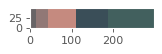

In [51]:
visualize = visualize_colors(cluster, cluster.cluster_centers_)
plt.imshow(visualize)
plt.show()

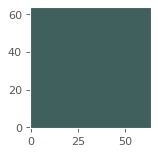

In [52]:
# А теперь посмотрим, какой у нас получился доминантный цвет при сжатии картинки до 1 пикселя
# Похоже на правду. Пока будем использовать его
pic = io_img[tmp]
dc = get_dominant_color(pic)
ppx = np.zeros_like(pic)
ppx[:,:,0] = dc[0]
ppx[:,:,1] = dc[1]
ppx[:,:,2] = dc[2]
plt.imshow(ppx)
plt.show()

In [53]:
## End #### K-Mean Clusters#####

In [54]:
#######MY_DATASETS##############

### My Dataset  (пробуем сами что-то сделать и посчитаь)

In [55]:
len(files)

27000

In [56]:
len(io_img)

27000

In [323]:
df_stat = pd.DataFrame(columns = ['id','class','z_max', 'z_min', 'z_mm_dst','r_sum', 'r_max', 'r_min', 'r_mm_dst', 'r_median', 'g_sum', 'g_max', 'g_min', 'g_mm_dst', 'g_median', 'b_sum', 'b_max', 'b_min', 'b_mm_dst', 'b_median', 'lum_max', 'lum_min', 'lum_dst', 'dom_r', 'dom_g', 'dom_b'])

i=0
for img in io_img:
    c_id = i
    c_class = yLabels[i]
    c_z_max = find_max(img)
    c_z_min = find_min(img)
    c_z_mm_dst = get_multy_distance(img)
    
    c_r_sum, c_g_sum, c_b_sum = get_sum_channels(img)
    c_r_median, c_g_median, c_b_median = get_median_channels(img)
    
    c_r_max = find_max_px_by_channel(img, 0)
    c_g_max = find_max_px_by_channel(img, 1)
    c_b_max = find_max_px_by_channel(img, 2)
    
    c_r_min = find_min_px_by_channel(img, 0)
    c_g_min = find_min_px_by_channel(img, 1)
    c_b_min = find_min_px_by_channel(img, 2)
    
    c_r_mm_dst = get_distance_red(img)
    c_g_mm_dst = get_distance_green(img)
    c_b_mm_dst = get_distance_blue(img)
    
    c_lum_max = lum_max(img)
    c_lum_min = lum_min(img)
    c_lum_dst = lum_distance(img)
    
    c_dom_r, c_dom_g, c_dom_b = get_dominant_color(img)
    
    df_stat.loc[i] = [c_id, c_class, c_z_max, c_z_min, c_z_mm_dst, c_r_sum, c_r_max, c_r_min, c_r_mm_dst, c_r_median, c_g_sum, c_g_max, c_g_min, c_g_mm_dst, c_g_median, c_b_sum, c_b_max, c_b_min, c_b_mm_dst, c_b_median, c_lum_max, c_lum_min, c_lum_dst, c_dom_r, c_dom_g, c_dom_b]
    
    if (i % 100 == 0):
        print(i)
    i = i + 1

len(df_stat)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

27000

In [324]:
# Сохраним наш датафрейм, т.к. собиралось 1 час
pd.DataFrame(df_stat).to_pickle("df_stat.pkl")

In [325]:
df_stat = pd.read_pickle("df_stat.pkl")
len(df_stat)

27000

In [326]:
# Посмотрим на полученные данные
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 0 to 26999
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        27000 non-null  float64
 1   class     27000 non-null  float64
 2   z_max     27000 non-null  float64
 3   z_min     27000 non-null  float64
 4   z_mm_dst  27000 non-null  float64
 5   r_sum     27000 non-null  float64
 6   r_max     27000 non-null  float64
 7   r_min     27000 non-null  float64
 8   r_mm_dst  27000 non-null  float64
 9   r_median  27000 non-null  float64
 10  g_sum     27000 non-null  float64
 11  g_max     27000 non-null  float64
 12  g_min     27000 non-null  float64
 13  g_mm_dst  27000 non-null  float64
 14  g_median  27000 non-null  float64
 15  b_sum     27000 non-null  float64
 16  b_max     27000 non-null  float64
 17  b_min     27000 non-null  float64
 18  b_mm_dst  27000 non-null  float64
 19  b_median  27000 non-null  float64
 20  lum_max   27000 non-null  fl

In [327]:
df_stat.head()

,id,class,z_max,z_min,z_mm_dst,r_sum,r_max,r_min,r_mm_dst,r_median,...,b_max,b_min,b_mm_dst,b_median,lum_max,lum_min,lum_dst,dom_r,dom_g,dom_b
0,0.0,0.0,515.0,264.0,40.816663,446883.0,211.0,81.0,42.190046,105.0,...,152.0,92.0,43.416587,104.0,167.5590,86.4950,59.135438,116.0,100.0,103.0
1,1.0,0.0,521.0,166.0,46.173586,410541.0,219.0,35.0,48.270074,56.0,...,144.0,65.0,35.355339,86.0,175.4050,56.6878,45.099889,55.0,98.0,81.0
2,2.0,0.0,578.0,247.0,62.393910,731426.0,221.0,61.0,63.324561,192.0,...,178.0,94.0,62.201286,148.0,190.4290,84.2534,67.082039,184.0,149.0,143.0
3,3.0,0.0,641.0,217.0,39.849718,628144.0,247.0,50.0,39.849718,184.0,...,188.0,86.0,39.849718,145.0,213.4170,74.7704,39.849718,192.0,160.0,147.0
4,4.0,0.0,496.0,217.0,28.460499,480218.0,187.0,49.0,15.524175,132.0,...,154.0,88.0,19.416488,127.0,164.1586,71.5554,18.973666,68.0,86.0,96.0


In [329]:
# Не очень хорошо получилось, сконвертим в целые числа
df_stat = df_stat.convert_dtypes()
df_stat.head()

,id,class,z_max,z_min,z_mm_dst,r_sum,r_max,r_min,r_mm_dst,r_median,...,b_max,b_min,b_mm_dst,b_median,lum_max,lum_min,lum_dst,dom_r,dom_g,dom_b
0,0,0,515,264,40.816663,446883,211,81,42.190046,105.0,...,152,92,43.416587,104.0,167.559,86.495,59.135438,116,100,103
1,1,0,521,166,46.173586,410541,219,35,48.270074,56.0,...,144,65,35.355339,86.0,175.405,56.6878,45.099889,55,98,81
2,2,0,578,247,62.39391,731426,221,61,63.324561,192.0,...,178,94,62.201286,148.0,190.429,84.2534,67.082039,184,149,143
3,3,0,641,217,39.849718,628144,247,50,39.849718,184.0,...,188,86,39.849718,145.0,213.417,74.7704,39.849718,192,160,147
4,4,0,496,217,28.460499,480218,187,49,15.524175,132.0,...,154,88,19.416488,127.0,164.1586,71.5554,18.973666,68,86,96


In [330]:
df_stat.corr()

,id,class,z_max,z_min,z_mm_dst,r_sum,r_max,r_min,r_mm_dst,r_median,...,b_max,b_min,b_mm_dst,b_median,lum_max,lum_min,lum_dst,dom_r,dom_g,dom_b
id,1.000000,0.994057,0.010814,-0.070130,0.005768,-0.207105,-0.070223,-0.126627,-0.013062,-0.213522,...,0.096677,0.022901,-0.008800,-0.055327,0.009125,-0.093646,0.018842,-0.178533,-0.125607,-0.041969
class,0.994057,1.000000,0.010175,-0.063797,0.005881,-0.203034,-0.068277,-0.121483,-0.013656,-0.208538,...,0.093525,0.026802,-0.009529,-0.053574,0.008617,-0.086348,0.018667,-0.176647,-0.124678,-0.043771
z_max,0.010814,0.010175,1.000000,0.322553,-0.017135,0.698279,0.975150,0.345116,0.017757,0.636506,...,0.977668,0.189338,-0.011449,0.640453,0.999054,0.325677,-0.027571,0.594685,0.591182,0.579372
z_min,-0.070130,-0.063797,0.322553,1.000000,0.027775,0.704492,0.351073,0.949906,0.054887,0.703990,...,0.277805,0.893556,0.042974,0.772729,0.323730,0.988886,0.026719,0.576078,0.584396,0.571123
z_mm_dst,0.005768,0.005881,-0.017135,0.027775,1.000000,0.010577,-0.009183,0.016870,0.506583,0.010372,...,-0.024583,0.038505,0.481010,0.008479,-0.016764,0.032440,0.753399,0.012524,0.011915,0.006049
r_sum,-0.207105,-0.203034,0.698279,0.704492,0.010577,1.000000,0.744266,0.757232,0.063176,0.984802,...,0.616383,0.480433,0.030063,0.885325,0.701501,0.715535,0.004754,0.849307,0.789437,0.718158
r_max,-0.070223,-0.068277,0.975150,0.351073,-0.009183,0.744266,1.000000,0.389714,0.027655,0.683631,...,0.912456,0.185250,-0.007234,0.632064,0.973578,0.360950,-0.020221,0.624666,0.599650,0.558611
r_min,-0.126627,-0.121483,0.345116,0.949906,0.016870,0.757232,0.389714,1.000000,0.052076,0.754469,...,0.279137,0.749368,0.036687,0.724252,0.348558,0.942893,0.016526,0.618646,0.587144,0.534554
r_mm_dst,-0.013062,-0.013656,0.017757,0.054887,0.506583,0.063176,0.027655,0.052076,1.000000,0.062914,...,0.007287,0.045092,0.336461,0.051944,0.018479,0.060715,0.439020,0.052024,0.049178,0.036850
r_median,-0.213522,-0.208538,0.636506,0.703990,0.010372,0.984802,0.683631,0.754469,0.062914,1.000000,...,0.555421,0.482684,0.031182,0.885885,0.640008,0.716183,0.005869,0.841654,0.773072,0.697977


In [ ]:
# Как и ожидалось, параметры сильно коррелируют между собой

In [ ]:
plt.imshow(img)
plt.show()

In [331]:
## End #### MY_DATASETS#####

In [57]:
####### ML #####################

### ML

In [58]:
def quality_report(prediction, actual, verbose=True):
    acc_s = metrics.accuracy_score(actual, prediction)

    confusion = metrics.confusion_matrix(actual, prediction)
    tn = confusion[0,0]
    fn = confusion[1,0]
    tp = confusion[1,1]
    fp = confusion[0,1]
    
    #quality_list = [acc_s, roc_auc, f1, tn, fn, tp, fp]
    #quality_list = [acc_s, f1, tn, fn, tp, fp]
    quality_list = [acc_s, tn, fn, tp, fp]
    
    if verbose:
        report_str = "Accuracy score: \t {:.3f}\n" +\
                "TN: \t {:.3f}\n" +\
                "FN: \t {:.3f}\n" +\
                "TP: \t {:.3f}\n" +\
                "FP: \t {:.3f}\n"
        print("\n=== Quality Report ===")
        #print(report_str.format(roc_auc, f1, tn, fn, tp, fp))
        #print(report_str.format(acc_s, f1, tn, fn, tp, fp))
        print(report_str.format(acc_s, tn, fn, tp, fp))
        print("======================\n")
    
    return quality_list

In [59]:
def class_report(prediction, actual, verbose=True):
    sk_report = metrics.classification_report(
    digits=3,
    y_true=prediction, 
    y_pred=actual)
    
    if verbose:
        print(sk_report)
        
    return sk_report

In [60]:
# yLabels and io_img are arrays of integers
x = np.array(raw_images)
y = np.array(yLabels)

Попробуем разбить наши подготовленные данные на тестовые и валидационные:

In [61]:
#For coloured
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = yLabels, train_size = 0.4, random_state=42)

#For Greyscale
#X_train, X_test, y_train, y_test = train_test_split(io_img_gs, yLabels, stratify = yLabels, train_size = 0.4, random_state=42)

print(X_train.shape)
print(X_test.shape)

(10800, 64, 64, 3)
(16200, 64, 64, 3)


In [62]:
# GreyScale our images
X_train_gs = np.zeros([X_train.shape[0], X_train.shape[1], X_train.shape[2]])
X_test_gs = np.zeros([X_test.shape[0], X_test.shape[1], X_test.shape[2]])

for i in range(X_train.shape[0]):
    X_train_gs[i] = rgb2gray(X_train[i])
    
for i in range(X_test.shape[0]):
    X_test_gs[i] = rgb2gray(X_test[i])

print(X_train_gs.shape)
print(X_test_gs.shape)


(10800, 64, 64)
(16200, 64, 64)


b'Forest'


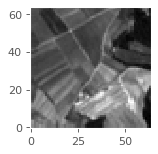

In [63]:
# Посмотрим, что у нас получилось
tmp2 = 15
img = X_train_gs[tmp2]

print(label_names[yLabels[tmp2]])

plt.imshow(img, cmap='gray'); # Без cmap передаём привет монохромным мониторам

In [64]:
print(X_train[1][0,0])
print(X_train_gs[1][0,0])

[0.36078431 0.4        0.40392157]
0.3919494117647059


Выглядит неплохо. Замечаем, что при переводе из цветного изображения в черно-белое у нас значения пикселя поменялись с int на float. Но это даже хорошо.



b'SeaLake'


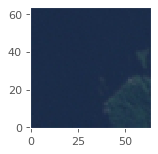

In [65]:
#Посмотрим, что не растеряли лейблы
tmp2 = 8000
img = X_train[tmp2]

print(label_names[y_train[tmp2]])
#plt.imshow(img);
plt.imshow(img, cmap='gray');

In [66]:
#Переводим наши данные в 2D-array
X_train_cl = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3])
X_test_cl = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3])

X_train_gs = X_train_gs.reshape(X_train_gs.shape[0], X_train_gs.shape[1] * X_train_gs.shape[2])
X_test_gs = X_test_gs.reshape(X_test_gs.shape[0],X_test_gs.shape[1] * X_test_gs.shape[2])
print(X_train_cl.shape)
print(X_test_cl.shape)

(10800, 12288)
(16200, 12288)


10800 - количество наших картинок в выборке
12288 - это 64x64x3 - размер наших изображений в RGB
4096 = 64x64 (это размер наших изображений)

#### Обучаем дерево решений для черно-белых изображений

In [67]:
# инициализируем модель
clf = tree.DecisionTreeClassifier(random_state = 42)

# обучаем ее на тренировочных данных
clf = clf.fit(X_train_gs, y_train)

# делаем предсказание для тестовых данных
y_pred_gs = clf.predict(X_test_gs)

print(metrics.accuracy_score(y_test, y_pred_gs))
ql_decision_tree_gs = quality_report(y_pred_gs, y_test);

0.3545061728395062

=== Quality Report ===
Accuracy score: 	 0.355
TN: 	 623.000
FN: 	 11.000
TP: 	 1134.000
FP: 	 9.000




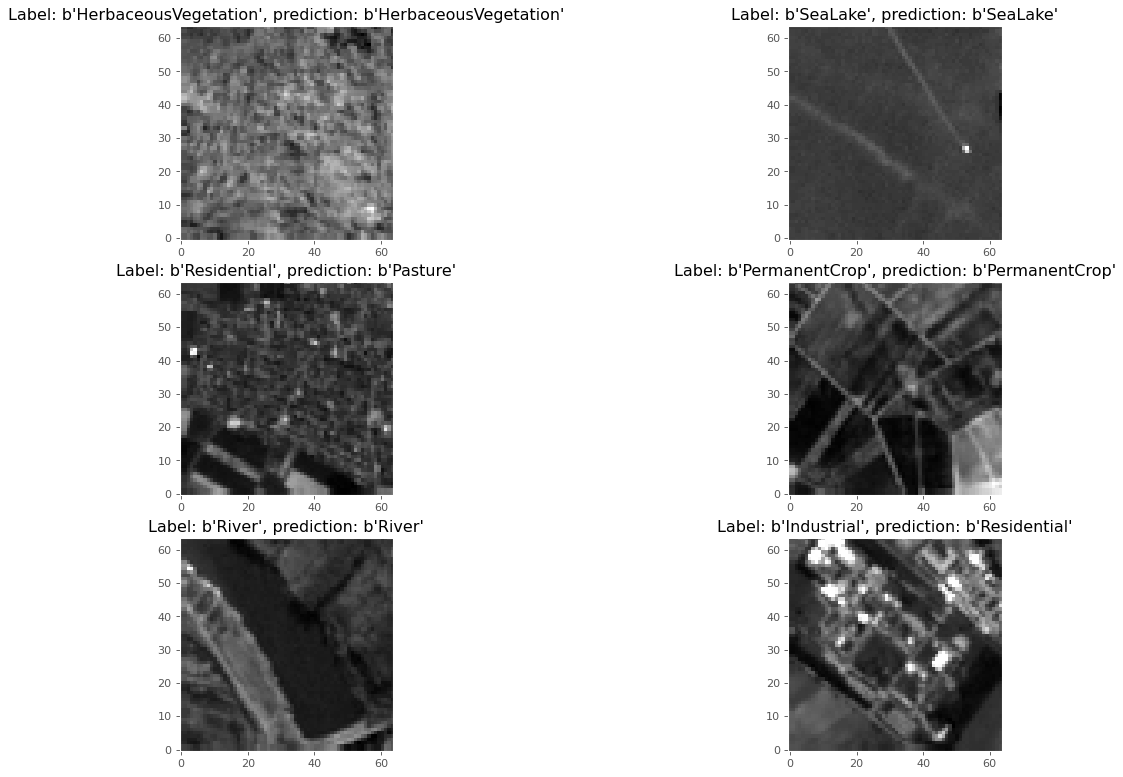

In [69]:
plt.figure(figsize=[18,12])
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.title("Label: "+str(label_names[y_test[i]])+", prediction: "+str(label_names[y_pred_gs[i]])) 
    plt.imshow(X_test_gs[i].reshape([64,64]),cmap='gray');

#### Обучим для цветных изображений

In [558]:
# инициализируем модель
clf = tree.DecisionTreeClassifier(random_state = 42)

# обучаем ее на тренировочных данных
clf = clf.fit(X_train_cl, y_train)

# делаем предсказание для тестовых данных
y_pred_cl = clf.predict(X_test_cl)
print(metrics.accuracy_score(y_test, y_pred_cl))

0.43320987654320986


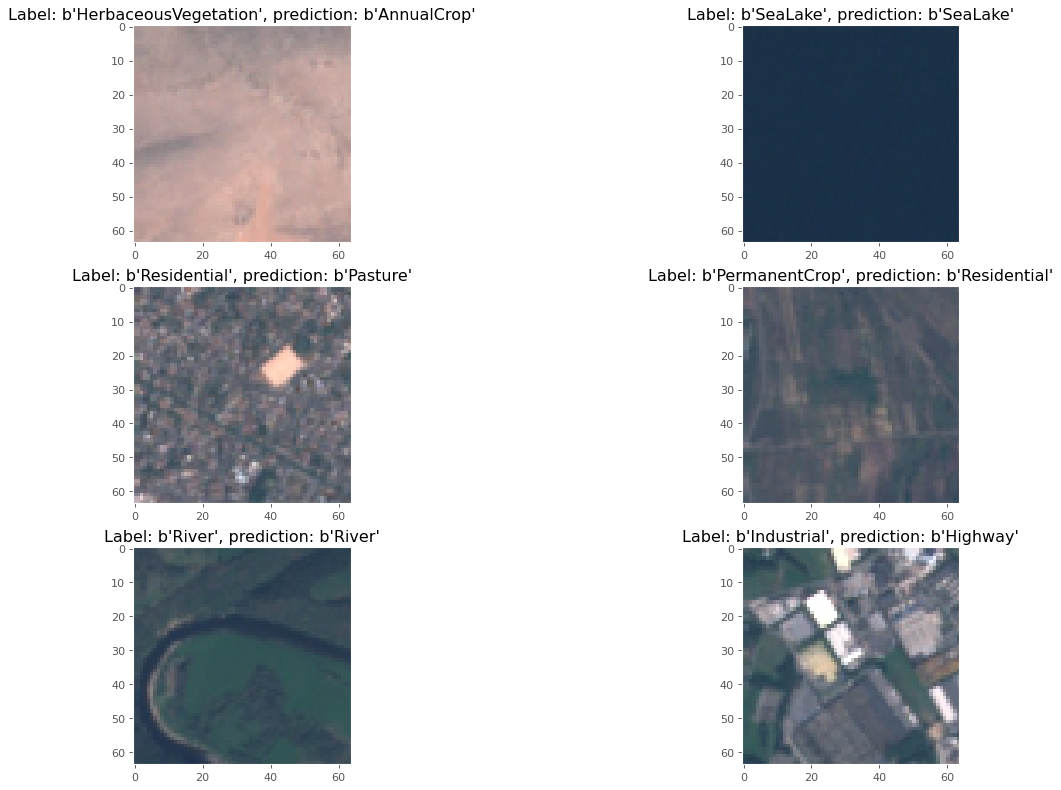

In [521]:
plt.figure(figsize=[18,12])
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.title("Label: "+str(label_names[y_test[i]])+", prediction: "+str(label_names[y_pred[i]])) 
    plt.imshow(X_test[i].reshape([64,64,3]),cmap='gray');

#### Попытаемся найти лучшие параметры для нашего дерева

<function matplotlib.pyplot.show(close=None, block=None)>

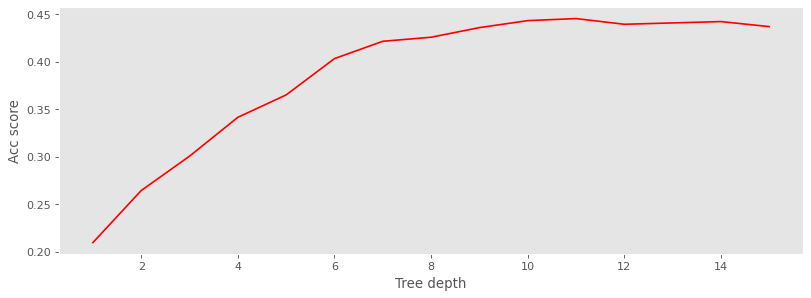

In [575]:
max_depths = np.linspace(1, 15, 15, endpoint=True)
results = []
for max_depth in max_depths:
    mdl = tree.DecisionTreeClassifier(max_depth=max_depth)
    mdl.fit(X_train_cl, y_train)
    test_pred = mdl.predict(X_test_cl)
    acc_s = metrics.accuracy_score(y_test, test_pred)
    results.append(acc_s)


plt.figure(figsize=[12,4])
plt.plot(max_depths, results, 'r', label='Test accuracy score')
plt.ylabel('Acc score')
plt.xlabel('Tree depth')
plt.show

Опытным путём было определено, что лучший max_depth = 11.Посчитаем с ним черно-белую модель:

In [557]:
# c 11 для Ч/Б
# инициализируем модель
clf = tree.DecisionTreeClassifier(max_depth=11, random_state=42)

# обучаем ее на тренировочных данных
clf = clf.fit(X_train_gs, y_train)

# делаем предсказание для тестовых данных
y_pred_gs = clf.predict(X_test_gs)

print(metrics.accuracy_score(y_test, y_pred_gs))
class_report(y_pred_gs, y_test);

0.36061728395061726
              precision    recall  f1-score   support

           0      0.424     0.333     0.373      2292
           1      0.792     0.639     0.707      2231
           2      0.292     0.172     0.217      3051
           3      0.161     0.203     0.179      1190
           4      0.347     0.464     0.397      1124
           5      0.280     0.321     0.299      1046
           6      0.194     0.192     0.193      1517
           7      0.212     0.305     0.250      1251
           8      0.275     0.382     0.320      1079
           9      0.524     0.665     0.587      1419

    accuracy                          0.361     16200
   macro avg      0.350     0.368     0.352     16200
weighted avg      0.377     0.361     0.361     16200



In [70]:
# c 11 для цветного изображения
# инициализируем модель
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=42)

# обучаем ее на тренировочных данных
clf = clf.fit(X_train_cl, y_train,)

# делаем предсказание для тестовых данных
y_pred_cl = clf.predict(X_test_cl)

print(metrics.accuracy_score(y_test, y_pred_cl))
class_report(y_pred_cl, y_test);

0.45037037037037037
              precision    recall  f1-score   support

           0      0.375     0.432     0.402      1562
           1      0.735     0.737     0.736      1794
           2      0.478     0.297     0.366      2900
           3      0.167     0.189     0.177      1325
           4      0.447     0.532     0.486      1261
           5      0.475     0.492     0.483      1159
           6      0.231     0.258     0.244      1347
           7      0.342     0.388     0.363      1584
           8      0.404     0.422     0.413      1436
           9      0.766     0.752     0.759      1832

    accuracy                          0.450     16200
   macro avg      0.442     0.450     0.443     16200
weighted avg      0.461     0.450     0.451     16200



C criterion='entropy' получается наилучший результат, поэтому оставим его.

<function matplotlib.pyplot.show(close=None, block=None)>

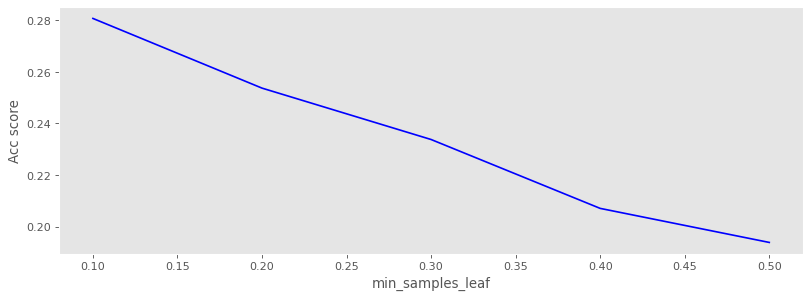

In [574]:
#Аналогично можно поиграться с min_samples_leaf

#min_leafs = np.linspace(0.1, 2, 20, endpoint=True) так не сработает
min_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
test_results = []
for min_spl in min_leafs:
    dt = tree.DecisionTreeClassifier(min_samples_leaf=min_spl, random_state=42, max_depth=11)
    dt.fit(X_train_cl, y_train)
    
    test_pred = dt.predict(X_test_cl)
    acc_s = metrics.accuracy_score(y_test, test_pred)
    test_results.append(acc_s)
    
    
plt.figure(figsize=[12,4])
plt.plot(min_leafs, test_results, 'b', label='Test min_samples_leaf')
plt.ylabel('Acc score')
plt.xlabel('min_samples_leaf')
plt.show

Похоже, тут лучше уже ничего не менять и переходить дальше.

### Теперь попробуем CVM

Сначала на Ч/Б:

In [ ]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid, verbose=3, n_jobs=-1)

model.fit(X_train_gs,y_train)

# Display parameters selected by GridSearchCV for SVM 3 classes
print("Best parameters to apply are:",model.best_params_)
# Display model after hyperparameter tuning
svm = model.best_estimator_
print("Model after tuning is:\n",svm)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


### Попробуем kNN

На Ч/Б:

In [80]:
# black & white:
knn = neighbors.KNeighborsClassifier(n_neighbors=3, n_jobs=3)
knn.fit(X_train_gs, y_train)
y_pred_knn = knn.predict(X_test_gs)
print(metrics.accuracy_score(y_test, y_pred_knn))
class_report(y_pred_knn, y_test);

0.1998148148148148
              precision    recall  f1-score   support

           0      0.569     0.263     0.360      3898
           1      0.005     0.033     0.009       276
           2      0.116     0.141     0.127      1479
           3      0.022     0.347     0.041        95
           4      0.000     0.000     0.000         0
           5      0.032     0.088     0.047       430
           6      0.009     0.178     0.017        73
           7      0.000     0.000     0.000         1
           8      0.103     0.655     0.178       235
           9      0.976     0.181     0.305      9713

    accuracy                          0.200     16200
   macro avg      0.183     0.189     0.108     16200
weighted avg      0.735     0.200     0.285     16200



/Users/ruactk1/Developer/.anaconda/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ruactk1/Developer/.anaconda/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ruactk1/Developer/.anaconda/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

На цветном изображении

In [81]:
# knn Coloured:
knn = neighbors.KNeighborsClassifier(n_neighbors=3, n_jobs=3)
knn.fit(X_train_cl, y_train)
y_pred_knn_cl = knn.predict(X_test_cl)
print(metrics.accuracy_score(y_test, y_pred_knn_cl))
class_report(y_pred_knn_cl, y_test);

0.3283333333333333
              precision    recall  f1-score   support

           0      0.594     0.356     0.445      3006
           1      0.481     0.637     0.548      1358
           2      0.568     0.274     0.370      3734
           3      0.033     0.374     0.060       131
           4      0.004     1.000     0.008         6
           5      0.269     0.501     0.350       645
           6      0.027     0.360     0.051       114
           7      0.016     0.718     0.030        39
           8      0.104     0.732     0.182       213
           9      0.977     0.253     0.402      6954

    accuracy                          0.328     16200
   macro avg      0.307     0.520     0.245     16200
weighted avg      0.713     0.328     0.403     16200



#### Попробуем найти лучший k

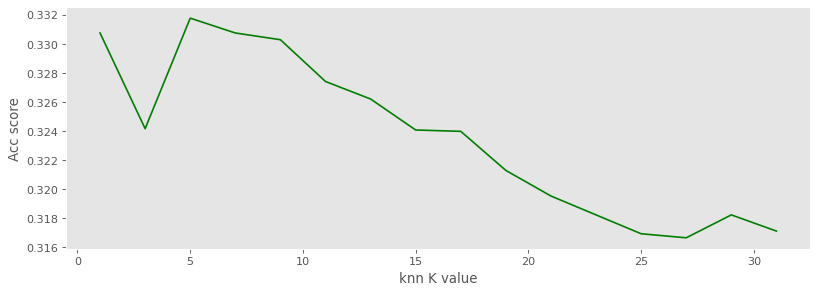

In [87]:
k_vars = list(range(1,32,2))
results = []
for k in k_vars:
    knn_search = neighbors.KNeighborsClassifier(n_neighbors=k, n_jobs=3)
    scores = cross_val_score(knn_search, X_train_cl, y_train, cv=10, scoring='accuracy')
    results.append(scores.mean())
    
plt.figure(figsize=[12,4])
plt.plot(k_vars, results, 'g', label='Test knn best k')
plt.ylabel('Acc score')
plt.xlabel('knn K value')
plt.show()

In [553]:
## End #### ML#####

In [ ]:
#######HISTPLOTS################

(array([0.00014648, 0.00029297, 0.00058594, 0.00109863, 0.00036621,
        0.00087891, 0.01259766, 0.02731934, 0.03171387, 0.06467285,
        0.02182617, 0.01450195, 0.0112793 , 0.00476074, 0.00395508,
        0.00944824, 0.00820313, 0.00622559, 0.00871582, 0.00915527,
        0.00791016, 0.01413574, 0.00827637, 0.00710449, 0.0079834 ,
        0.00432129, 0.0046875 , 0.00483398, 0.00205078, 0.00095215]),
 array([ 63.        ,  66.33333333,  69.66666667,  73.        ,
         76.33333333,  79.66666667,  83.        ,  86.33333333,
         89.66666667,  93.        ,  96.33333333,  99.66666667,
        103.        , 106.33333333, 109.66666667, 113.        ,
        116.33333333, 119.66666667, 123.        , 126.33333333,
        129.66666667, 133.        , 136.33333333, 139.66666667,
        143.        , 146.33333333, 149.66666667, 153.        ,
        156.33333333, 159.66666667, 163.        ]),
 <BarContainer object of 30 artists>)

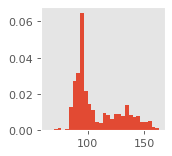

In [269]:
#sb.histplot(data=io_img[10001][:,:,0].flatten())
plt.hist(io_img[1001][:,:,1].flatten() , density=True, bins=30)

In [297]:
pics[:,:,:,0].T

array([[[ 42,  42,  30, ...,  60,  69,  49],
        [ 45,  41,  30, ...,  60,  70,  52],
        [ 47,  41,  28, ...,  61,  63,  55],
        ...,
        [ 48, 157,  28, ...,  60,  77,  86],
        [ 47, 171,  31, ...,  53,  76,  76],
        [ 45, 132,  32, ...,  52,  77,  72]],

       [[ 45,  41,  30, ...,  60,  70,  51],
        [ 45,  41,  30, ...,  60,  72,  52],
        [ 47,  40,  30, ...,  61,  63,  53],
        ...,
        [ 46, 154,  31, ...,  58,  77,  84],
        [ 46, 168,  33, ...,  52,  78,  76],
        [ 43, 129,  34, ...,  51,  77,  74]],

       [[ 47,  43,  30, ...,  64,  69,  53],
        [ 47,  43,  30, ...,  64,  69,  54],
        [ 47,  40,  30, ...,  68,  62,  47],
        ...,
        [ 44, 101,  37, ...,  64,  79,  79],
        [ 44, 115,  37, ...,  57,  76,  75],
        [ 45, 101,  40, ...,  53,  76,  77]],

       ...,

       [[ 47,  43,  29, ...,  65,  71,  43],
        [ 48,  43,  29, ...,  65,  70,  43],
        [ 50,  44,  31, ...,  67,  68,  36

In [310]:
    imgs = np.asarray(io);
    reds = imgs[:,:,:,0];
    reds2 = reds.reshape(*reds.shape[:-2], -1)

In [311]:
reds2.shape

(54000, 4096)

In [163]:
pic = io_img[tmp]
#res = pic.reshape(*pic.shape[:-2], -1)
res = pic.sum(axis=2)

res.shape
res[2,2]



384

In [183]:
pic[0,0]

Array([149, 121, 120], dtype=uint8)

In [175]:
lum(pic[0,0])

126.8806

In [184]:
k=np.apply_along_axis(lum, 2, pic)

In [185]:
k[0,0]

126.8806

In [200]:
pi = get_dominant_color(pic)
pi

(116, 100, 103)